# Human Stress Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('SaYoPillow.csv')

In [4]:
df.head(2)

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.60,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.88,89.552,98.88,1.552,72.76,3


In [5]:
df.columns=[['snoring range','respiration rate','body temperature','limb movement rate', 
            'blood oxygen levels','eye movement', 
            'number of hours of sleep', 'heart rate','Stress Levels']]

In [6]:
df.head()

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
corr = df.corr()

In [8]:
corr['Stress Levels']

,Stress Levels
snoring range,0.975322
respiration rate,0.963516
body temperature,-0.962354
limb movement rate,0.971071
blood oxygen levels,-0.961092
eye movement,0.951988
number of hours of sleep,-0.973036
heart rate,0.963516
Stress Levels,1.000000


In [9]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
x = df.iloc[:,:-1]
x

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12
...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32


In [ ]:
y =df.iloc[:,-1]
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: (Stress Levels,), Length: 630, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

# Feature Selection 1

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [ ]:
kbest = SelectKBest(mutual_info_classif,k=4)
slectfeture = kbest.fit(xtrain,ytrain)

In [ ]:
xtrain.columns[slectfeture.get_support()]

MultiIndex([(   'snoring range',),
            ('respiration rate',),
            (    'eye movement',),
            (      'heart rate',)],
           )

In [ ]:
x1 = df[['snoring range','respiration rate','blood oxygen levels','heart rate']]

In [ ]:
x1.head(1)

,snoring range,respiration rate,blood oxygen levels,heart rate
0,93.8,25.68,89.84,74.2


In [ ]:
x1train,x1test,y1train,y1test = train_test_split(x1,y,test_size = 0.20)

In [ ]:
x1train.head(1)

,snoring range,respiration rate,blood oxygen levels,heart rate
436,77.12,21.712,91.712,64.28


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model1 = AdaBoostClassifier()
model1.fit(x1train,y1train)

AdaBoostClassifier()

In [ ]:
# print('train score',model1.score(xtrain,ytrain))
# print('test score',model1.score(xtest,ytest))

# Feature Selection 2

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [ ]:
sp = SelectPercentile(mutual_info_classif,percentile = 2)
slectfeature2 = sp.fit(xtrain,ytrain)

In [ ]:
xtrain.columns[slectfeature2.get_support()]

MultiIndex([('snoring range',)],
           )

# Train model

In [ ]:
xtrain.head(2)

,snoring range,respiration rate,body temperature,limb movement rate,blood oxygen levels,eye movement,number of hours of sleep,heart rate
339,89.120,24.432,91.216,15.040,89.216,98.04,1.216,71.08
168,99.776,29.776,89.720,18.888,87.664,104.72,0.000,84.44


In [ ]:
model2 = AdaBoostClassifier()
model2.fit(xtrain,ytrain)

AdaBoostClassifier()

In [ ]:
print('train score',model2.score(xtrain,ytrain))
print('test score',model2.score(xtest,ytest))

train score 0.5972222222222222
test score 0.6031746031746031


# feature importance again train model

In [ ]:
imp = model2.feature_importances_
imp = pd.DataFrame(imp)

In [ ]:
feature = xtrain.columns
feature = pd.DataFrame(feature)

In [ ]:
importfeature = pd.concat([imp,feature],axis=1)
importfeature.columns=['importace','feature']

In [ ]:
importfeature

,importace,feature
0,0.56,"(snoring range,)"
1,0.18,"(respiration rate,)"
2,0.00,"(body temperature,)"
3,0.08,"(limb movement rate,)"
4,0.00,"(blood oxygen levels,)"
5,0.14,"(eye movement,)"
6,0.00,"(number of hours of sleep,)"
7,0.04,"(heart rate,)"


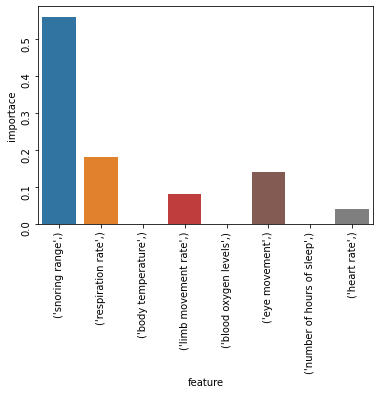

In [ ]:
sns.barplot(x= importfeature['feature'],y = importfeature['importace'])
plt.tick_params(rotation =90)

In [ ]:
x2 = df[['body temperature','blood oxygen levels','number of hours of sleep','respiration rate']]

In [ ]:
x2.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
0,91.840,89.840,1.840,25.680
1,91.552,89.552,1.552,25.104


In [ ]:
x2train,x2test,y2train,y2test = train_test_split(x2,y,test_size = 0.20)

In [ ]:
x2train.head(2)

,body temperature,blood oxygen levels,number of hours of sleep,respiration rate
9,95.104,93.656,6.104,19.104
88,91.664,89.664,1.664,25.328


In [ ]:
y2train.head(2)

9     1
88    3
Name: (Stress Levels,), dtype: int64

In [ ]:
model3 = AdaBoostClassifier()
model3.fit(x2train,y2train)

AdaBoostClassifier()

In [ ]:
print('train score',model3.score(x2train,y2train))
print('test score',model3.score(x2test,y2test))

train score 0.6031746031746031
test score 0.5873015873015873


In [ ]:
import pickle
pickle.dump(model3,open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))
result = model.predict(np.array([93.824,91.824,4.736,21.824]).reshape(1,4))
print(result)

[2]


In [ ]:
from joblib import dump

dump(model3, 'filename.joblib')

['filename.joblib']